In [116]:
import importlib

import numpy as np
import pandas as pd
import joblib
import mne
from math import *

import matplotlib.pyplot as plt

import generisAPI
importlib.reload(generisAPI)

import generisAPI.plots as plots
importlib.reload(generisAPI.plots)

<module 'generisAPI.plots' from '/media/emmanuel/DATA/Emmanuel_petron_Olateju/github/ubuntu/MMN_SZ/notebooks/generisAPI/plots.py'>

In [2]:

electrodes=[
    'Fp1','Fp2','F3','F4','C3',
    'C4','P3','P4','O1','O2',
    'F7','F8','T3','T4','T5',
    'T6','FZ','PZ','CZ',
    ]

In [3]:
features = joblib.load('../features/MMN_hubFuzzyEntropy.sav')

In [5]:
y = features['category']
X_mmn_1k = features['MMN_1KHz']
X_mmn_3k = features['MMN_3KHz']
X_entropies = features.iloc[:,2:-1]

In [86]:
samp = X_mmn_1k['10'][:,1]

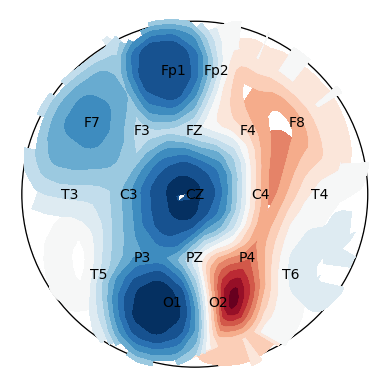

In [117]:
fig,ax = plt.subplots(1,1)
plots.montage_plot(samp,electrodes,ax)